In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### load data

In [6]:
def load_data(filepath):
    dataset = pd.read_csv(filepath)
    X = dataset[["area_sqr_ft", "price_lakhs"]].values
    y = dataset["affordable"].values.reshape(-1, 1)
    return X, y


### Logistic Regression Model (From Scratch)

In [8]:
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros((n_features, 1))
        self.b = 0

        for i in range(self.n_iters):
            linear_model = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

            if i % 100 == 0:
                loss = self._log_loss(y, y_pred)
                print(f"Iteration {i}: Log Loss = {loss:.4f}")

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.w) + self.b)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

    def _log_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)


###  Load Data, Train, Evaluate & Visualize

In [10]:
# Replace with your CSV path
X, y = load_data("affordable.csv")

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = LogisticRegressionFromScratch(learning_rate=0.1, n_iters=1000)
model.fit(X_scaled, y)

# Predict & evaluate
y_pred = model.predict(X_scaled)
acc = model.accuracy(y, y_pred)
print(f"\nModel Accuracy: {acc:.4f}")


Iteration 0: Log Loss = 0.6931
Iteration 100: Log Loss = 0.4242
Iteration 200: Log Loss = 0.3970
Iteration 300: Log Loss = 0.3861
Iteration 400: Log Loss = 0.3808
Iteration 500: Log Loss = 0.3779
Iteration 600: Log Loss = 0.3763
Iteration 700: Log Loss = 0.3753
Iteration 800: Log Loss = 0.3747
Iteration 900: Log Loss = 0.3743

Model Accuracy: 0.7500


### Visualization

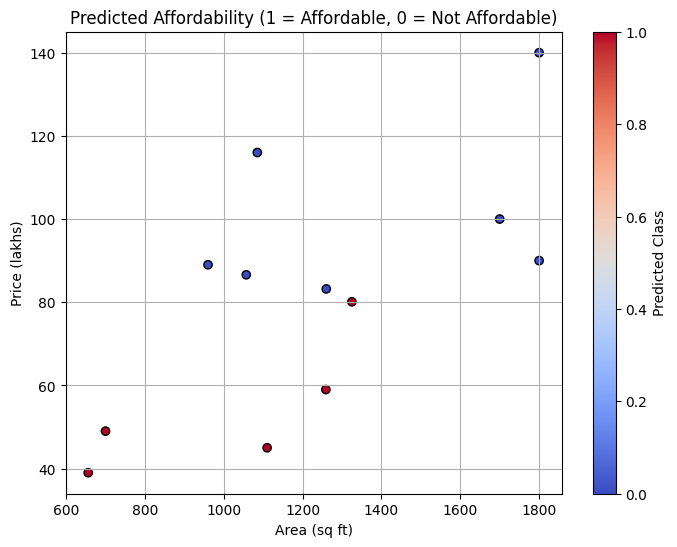

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred.reshape(-1), cmap="coolwarm", edgecolors="k")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (lakhs)")
plt.title("Predicted Affordability (1 = Affordable, 0 = Not Affordable)")
plt.colorbar(label="Predicted Class")
plt.grid(True)
plt.show()
